# Stellar Multiplicity

Figure 12.1 from Chapter 12 of *Stellar Structure & Evolution*, Pinsonneault & Ryden, Cambridge University
Press.


Data are from the Moe and DiStefano [2017, ApJS, 230, 15](https://ui.adsabs.harvard.edu/abs/2017ApJS..230...15M), Table 13.

In [5]:
import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.

In [6]:
plotFile = 'Fig12_1.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

# Graphic dimensions depending on bitmap or vector format (draft vs production)

dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 8
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)
    
# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

### Multiplicity and Companion-Star Frequency Data

ASCII format tables derived from Table 13 from Moe and DiStefano 2017.  Columns are:
 * logM - log of mean mass of the bin
 * logM_l - log (lower mass / mean mass)
 * logM_u - log (upper mass / mean mass)
 * F_m - multiplicity frequency F<sub>M</sub>
 * errFm - error in F<sub>M</sub>
 * F_c - companion frequency F<sub>C</sub>
 * errFc - error in F<sub>C</sub>

Plotting the 2-d error bars requires some processing of logM_l and logM_u because of the way they are 
listed in the table as log(upper/mean) or log(mean/lower), and they are not "error bars" but the limits 
of the mass bins.

In [7]:
dataFile = 'Multiplicity_Moe_DiStefano_2017.txt'
data = pd.read_csv(dataFile,sep=r'\s+',comment='#')
mass = 10**np.array(data['logM'])
mlower = mass - mass/10**np.array(data['logM_l'])
mupper = mass*10**np.array(data['logM_u']) - mass
errM = [mlower,mupper]
Fm = np.array(data['F_m'])
errFm = np.array(data['errFm'])
Fc = np.array(data['F_c'])
errFc = np.array(data['errFc'])

# range of masses and multiplicity/companion frequencies

mMin = 0.5
mMax = 50.0

fMin = 0.0
fMax = 2.5

### Stellar Multiplicity Statistics plot

Plot the multiplicity frequency (Fm) as filled white circles and companion frequncy (Fc) filled black squares. Draw a dashed line at a frequency of 1.

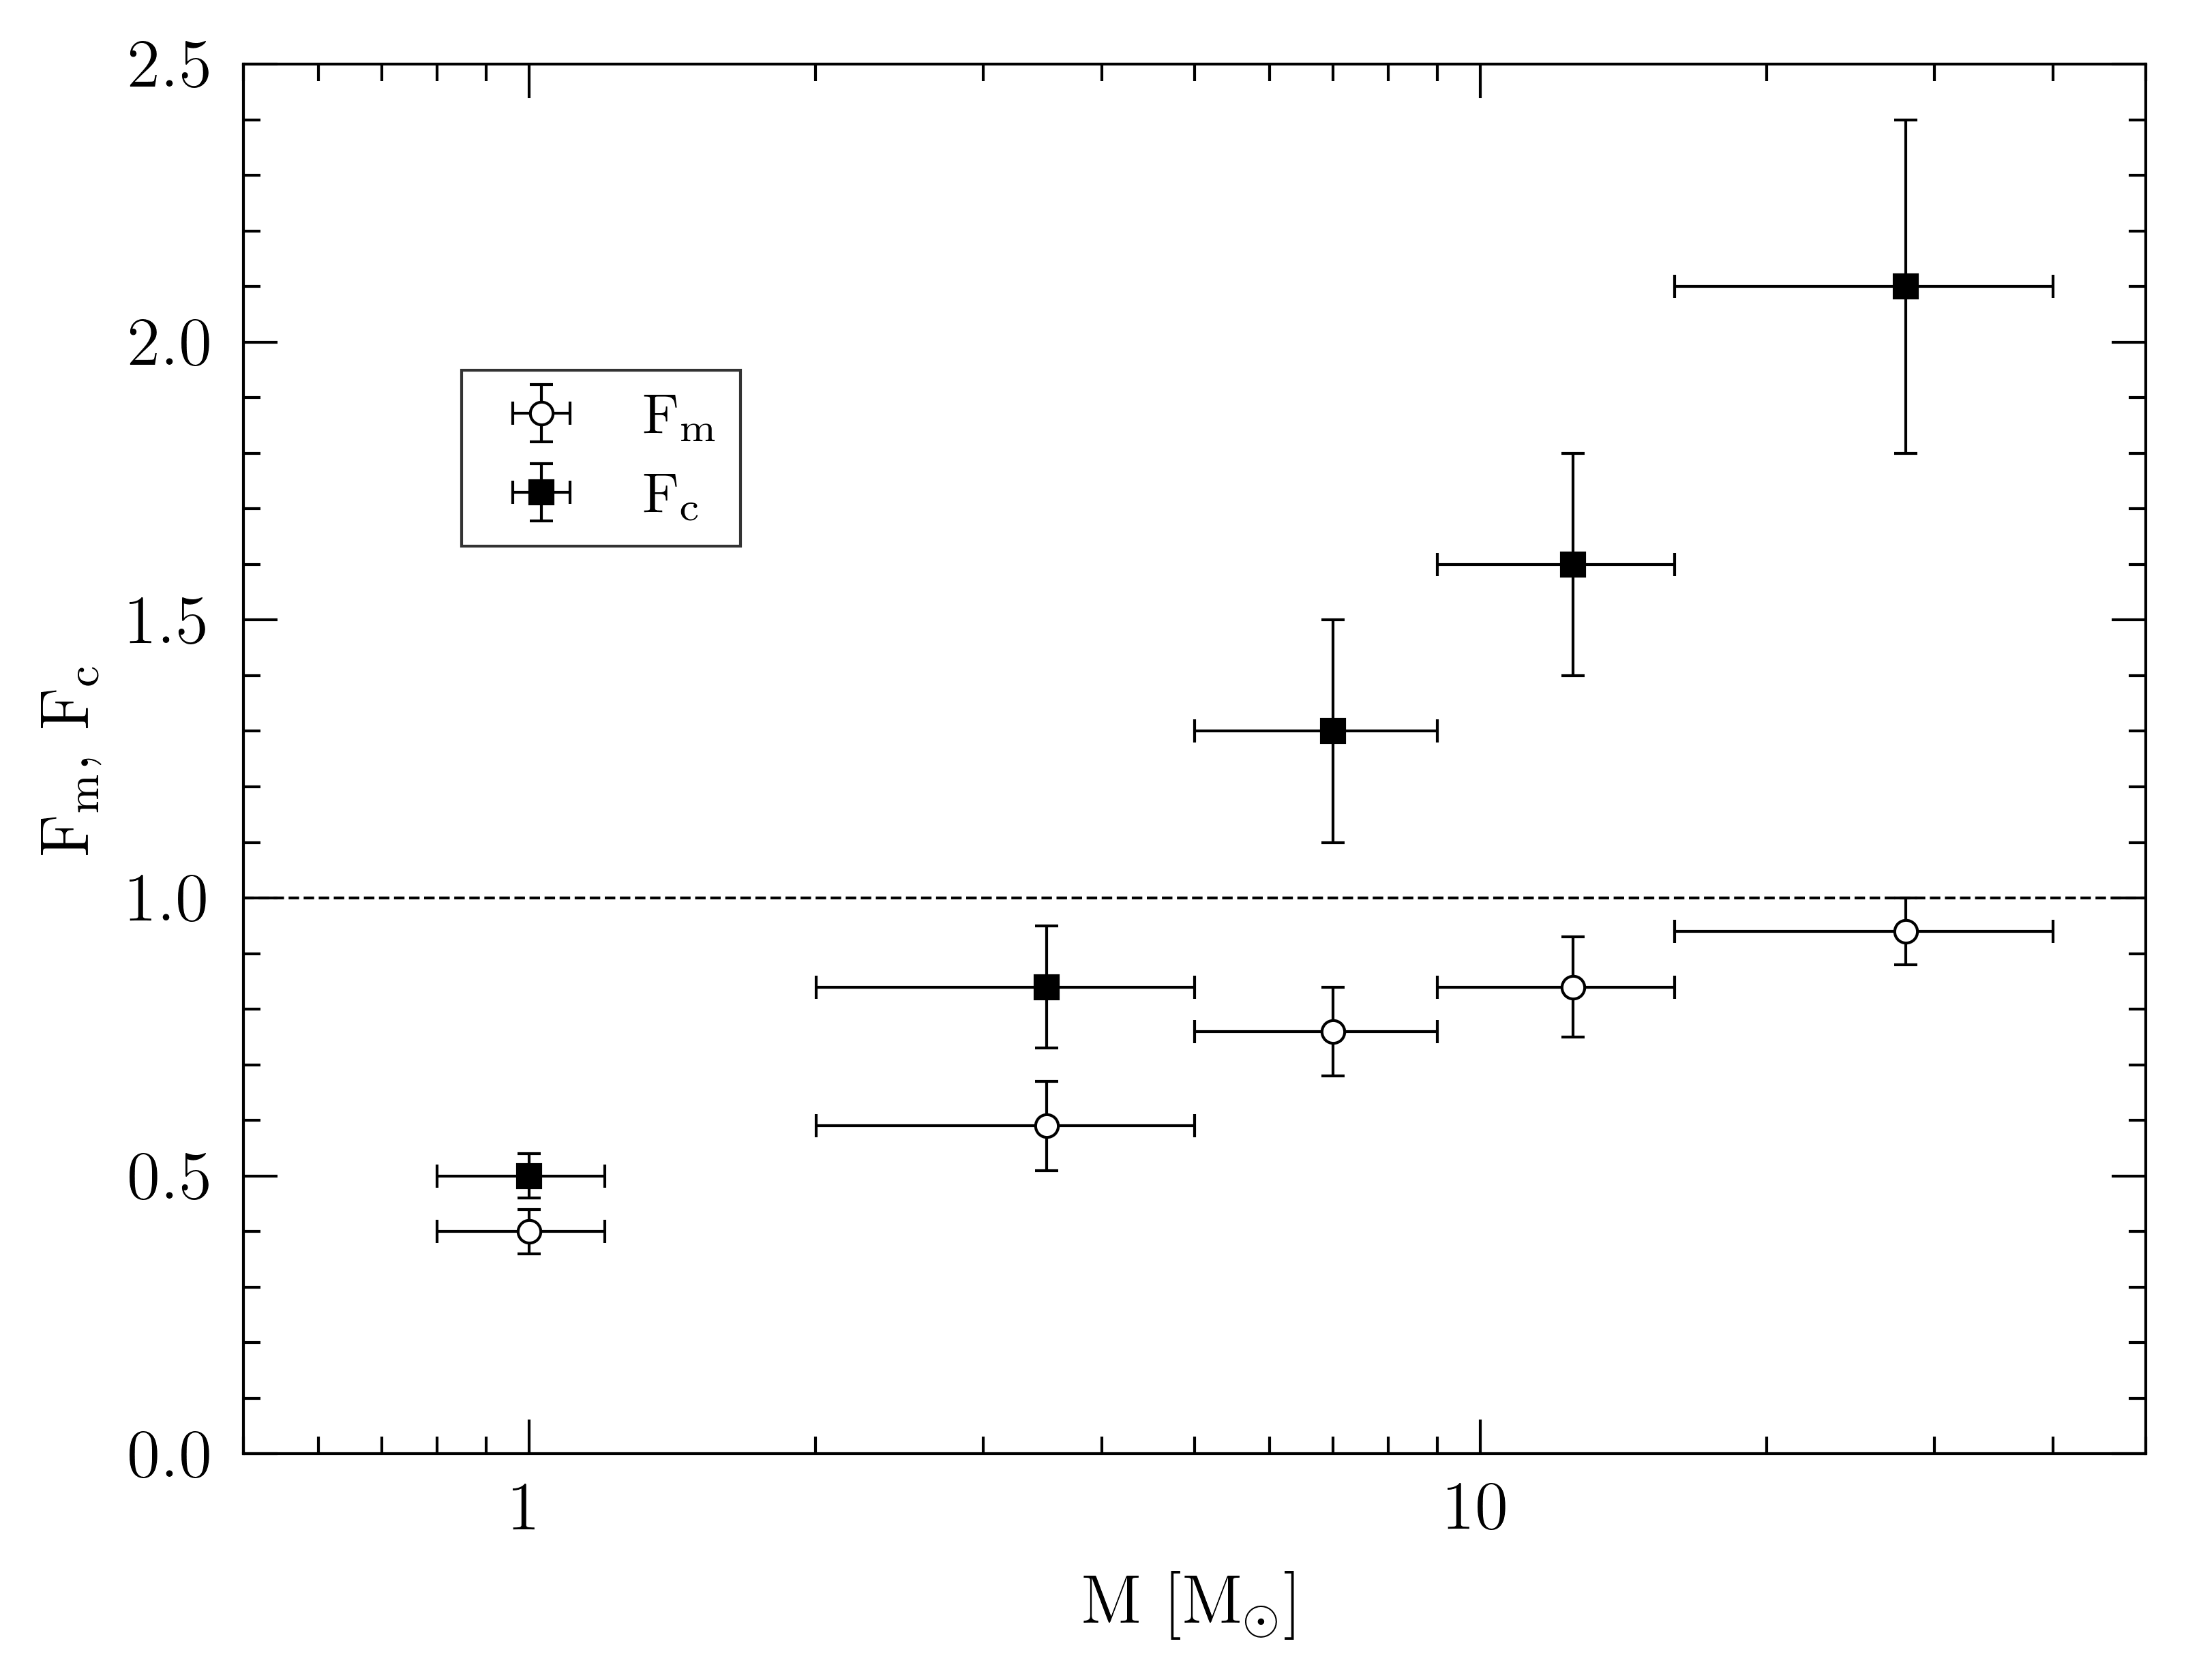

In [8]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

ax.set_xlim(mMin,mMax)
ax.set_xscale('log')
ax.set_xticks([1,10])
ax.set_xticklabels(['1','10'])
ax.set_xlabel(r'M [M$_\odot$]',fontsize=axisFontSize)

ax.set_ylim(fMin,fMax)
ax.yaxis.set_major_locator(MultipleLocator(0.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_ylabel(r'F$_{\rm m}$, F$_{\rm c}$',fontsize=axisFontSize)

ax.errorbar(mass,Fm,xerr=errM,yerr=errFm,fmt='o',color='black',mfc='white',elinewidth=0.5,mew=0.5,ms=4,
            capsize=2,zorder=10,label=r'F$_{\rm m}$')

ax.errorbar(mass,Fc,xerr=errM,yerr=errFc,fmt='s',color='black',mfc='black',elinewidth=0.5,mew=0.5,ms=4,
            capsize=2,zorder=9,label=r'F$_{\rm c}$')

ax.hlines(1.0,mMin,mMax,ls=['--'],zorder=8,lw=0.5,colors=['black'])

legend = ax.legend(fontsize=10,loc='upper left',fancybox=False,edgecolor='black',
                   framealpha=None,bbox_to_anchor=(0.1,0.8))
frame = legend.get_frame()
frame.set_linewidth(0.5)

# make the PNG file

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')